## To create NN which can classify whether the given data belongs to which number.A number can range from 0 to 9.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import keras

Loading the MNIST inbuilt dataset

In [2]:
data=keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [ ]:
X_train.dtype

dtype('uint8')

In [4]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train[59999].shape

(28, 28)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
X_train[7].shape

(28, 28)

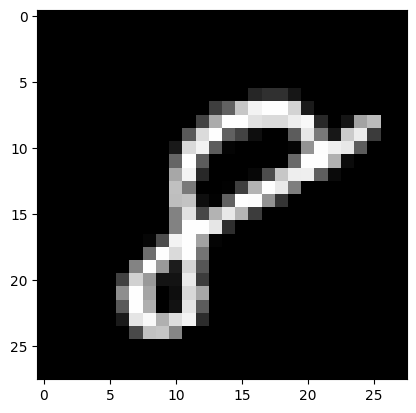

In [9]:
plt.imshow(X_train[59999],cmap='gray')

In [ ]:
y_train[7]

In [ ]:
X_train[2]

<Axes: >

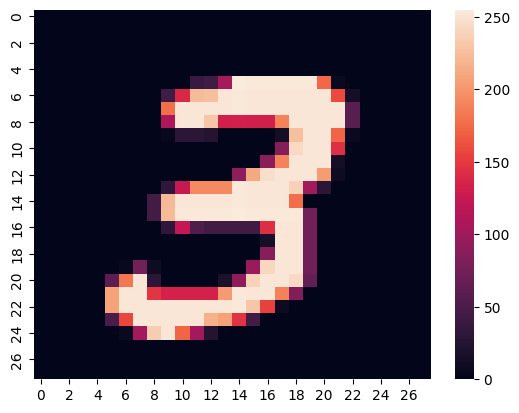

In [ ]:
import seaborn as sns
sns.heatmap(X_train[7])

In [ ]:
y_train[2]

In [ ]:
plt.imshow(X_train[4])

In [ ]:
y_train[4]

In [ ]:
type(X_train)

In [ ]:
X_train[0]

In [ ]:
X_train[0].shape

In [ ]:
X_train.dtype,y_train.dtype

Validation data creation

In [ ]:
len(X_train)

In [10]:
x_valid,x_train=X_train[:5000]/255,X_train[5000:]/255
y_valid,y_train=y_train[:5000],y_train[5000:]

In [ ]:
print(x_train.shape)
print(x_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


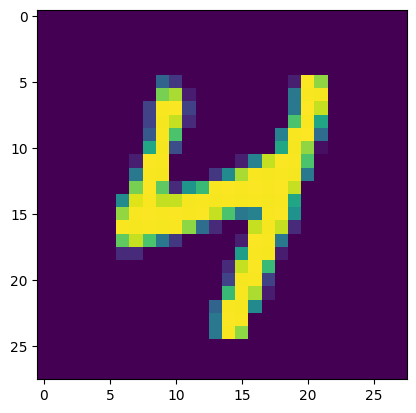

In [ ]:
plt.imshow(x_train[111])

In [ ]:
y_train[111]

4

In [ ]:
len(y_train)

In [ ]:
x_valid.shape,y_valid.shape

In [ ]:
plt.imshow(x_valid[2])

In [ ]:
x_valid[2]

Visualize the data

In [ ]:
plt.imshow(x_valid[0])

In [ ]:
plt.imshow(x_valid[1], cmap="binary")
# plt.axis("off")
plt.show()
# y_valid[1]

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(x_train[0], annot=True, cmap="binary")

Building Model Architecture

In [ ]:
len(np.unique(y_train))

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
x_train.shape

(55000, 28, 28)

In [13]:
LAYERS = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name="InputLayer"),
          tf.keras.layers.Dense(500, activation="relu", name="HiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="HiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer"),

]

In [14]:
model = tf.keras.models.Sequential(LAYERS)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 500)               392500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               50100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 443610 (1.69 MB)
Trainable params: 443610 (1.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
weights,bias = model.layers[1].get_weights()

In [16]:
weights.shape

(784, 500)

In [17]:
bias.shape

(500,)

<Axes: ylabel='Density'>

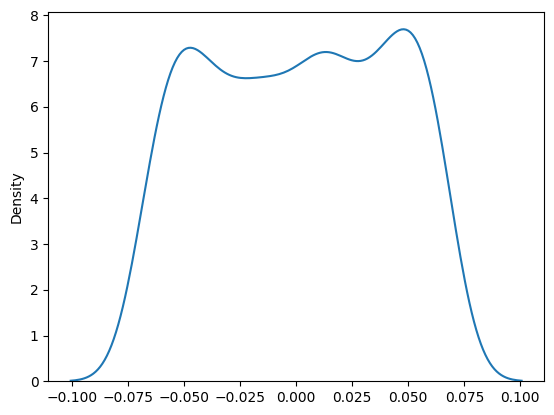

In [18]:
import seaborn as sns
sns.kdeplot(weights[:,1])

In [ ]:
model.summary()

In [ ]:
784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10

In [ ]:
sum([784 * 300 + 300, 300 * 100 + 100, 100 * 10 + 10])

In [ ]:
hidden1 = model.layers[1] ## it will call hidden layer 1

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

In [ ]:
biases

In [19]:
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "adam"
METRICS = ["accuracy"]

model.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


### Important -

* **Epochs**: Integer.
    
    Number of epochs to train the model. An epoch is an iteration over the entire x and y data provided.

* **batch_size**: Integer or None.
    
    Number of samples per gradient update. If unspecified, batch_size will default to 32.
    
    *NOTE:* Do not specify the batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

* **validation_batch_size**: Integer or None.

    Number of samples per validation batch.
    
    If unspecified, will default to batch_size.
    
    *NOTE:* Do not specify the validation_batch_size if your data is in the form of datasets, generators, or keras.utils.Sequence instances (since they generate batches).

[Reference](https://www.tensorflow.org/api_docs/python/tf/keras/Model?hl=zh-tw#fit)

In [20]:
 ## Training the model
EPOCHS = 10
VALIDATION_SET = (x_valid, y_valid)

history = model.fit(x_train, y_train,
                    epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/10
1719/1719 [==============================] - 9s 4ms/step - loss: 0.1969 - accuracy: 0.9403 - val_loss: 0.1009 - val_accuracy: 0.9716
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0819 - accuracy: 0.9741 - val_loss: 0.0801 - val_accuracy: 0.9778
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.1145 - val_accuracy: 0.9688
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0417 - accuracy: 0.9866 - val_loss: 0.0748 - val_accuracy: 0.9794
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0331 - accuracy: 0.9893 - val_loss: 0.0718 - val_accuracy: 0.9816
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0282 - accuracy: 0.9906 - val_loss: 0.0881 - val_accuracy: 0.9772
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0794 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test) ## evaluating model on testing data

313/313 [==============================] - 1s 2ms/step - loss: 23.6504 - accuracy: 0.9791


[23.650394439697266, 0.9790999889373779]

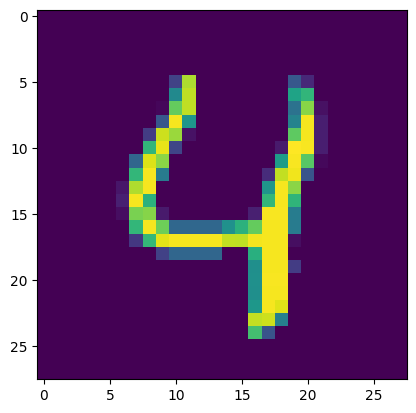

In [ ]:
plt.imshow(X_test[4])

In [ ]:
y_test[4]

4

In [ ]:
np.argmax(model.predict(X_test[4].reshape(1,28,28)))

1/1 [==============================] - 0s 113ms/step


4

In [ ]:
model.save("model.h5")  ## Saving the model

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model("/content/model.h5") ## Loading the saved model

In [ ]:
history.history

In [ ]:
history.history['val_accuracy']

In [ ]:
history.history['accuracy']

In [ ]:
model.get_weights()

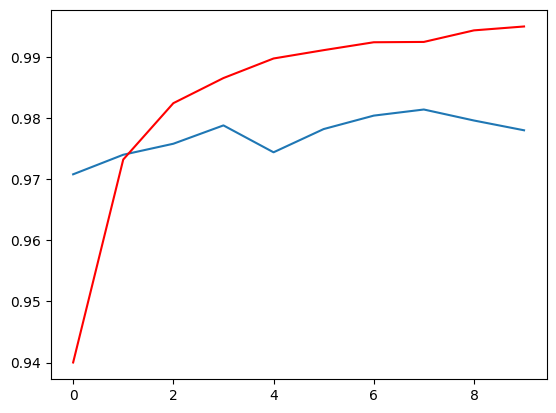

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'],color = 'red')

In [ ]:
## Creating metrix for performance during training
import pandas as pd
pd.DataFrame(history.history)

In [ ]:
X_new = X_test[:3]
y_new = y_test[:3]
y_proba = model.predict(X_new)
y_proba


In [ ]:
import numpy as np
y_pred = np.argmax(y_proba, axis=-1)
y_pred, y_new

In [ ]:
for data, pred, actual in zip(X_new, y_pred, y_new):
  plt.(dimshowata, cmap="binary")
  plt.title(f"Predicted: {pred}, Actual: {actual}")
  plt.axis("off")
  plt.show()
  print("---"*20)

In [ ]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
plt.plot(train_loss)
plt.plot(val_loss,color='red')